<h1 style="color:Green;">Week 2 Lab - due by 17th July, 2022 (11:59 pm CDT )</h1> 

## By Shyam Parikh

<a style="color:purple;" href="https://docs.google.com/presentation/d/1IsoKGNILvIqfo_yzBJYTCIf9qg4YysTIOFrJix6jYDI/edit#slide=id.g11b032e97d3_0_0">[Week 2 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to practice portfolio hedging and risk management</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from matplotlib.ticker import FuncFormatter
from scipy.stats import t, laplace, expon, uniform, norm
import statsmodels.api as sm
import random
import pandas_datareader as pdr

<h2 style="color:Green;">Problem 1: Exploring Sector ETFs</h2><br/>

A sector exchange-traded fund (ETF) is a pooled investment vehicle that invests specifically in the stocks and securities of a particular industry or sector, typically identified in the fund's title. For instance, a sector ETF may track a representative basket of stocks from a specific economic sector.<br>
<br>
Here is the list of sector ETFs:
<ul>
  <li>Healthcare: XLV</li>
  <li>Utilities: XLU</li>
  <li>Consumer Staples: XLP</li>
  <li>Materials: XLB</li>
  <li>Financials: XLF</li>
  <li>Energy: XLE</li>
  <li>Real Estate: XLRE</li>
  <li>Information Technology: XLK</li>
  <li>Consumer Discretionary: XLY</li>
  <li>Communication Services: XLC</li>
  <li>Industrials: XLI</li>
</ul>

Suppose that a portfolio manager is interested in concentrating the clients' assets in two sector ETFs. You, as a quantitative analyst generated the summary statistics table below to help with the manager's decision.
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [33]:
ETF_SYMBOLS = ['XLV','XLU','XLP','XLB','XLF','XLE','XLRE','XLK','XLY','XLI','XLC'] # Enter the ticker symbols here
TAU = 5         # Enter duration of data you want from Yahoo Finance
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
etfPxList = pdr.DataReader(ETF_SYMBOLS, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
etfLogRetList = np.log(etfPxList).diff().dropna()
sum_stats = pd.DataFrame({'mean':etfLogRetList.mean(), 'sd': etfLogRetList.std(), 'skewness':etfLogRetList.skew(), 'excess kurtosis':etfLogRetList.kurtosis()})
sum_stats

,mean,sd,skewness,excess kurtosis
Symbols,,,,
XLV,0.000469,0.012556,-0.433978,10.650338
XLU,0.000447,0.014538,-0.258791,17.749899
XLP,0.000449,0.011295,-0.524834,16.257880
XLB,0.000286,0.015734,-0.614454,9.917147
XLF,0.000211,0.017656,-0.601326,13.642914
XLE,0.000126,0.024188,-0.944248,13.571539
XLRE,0.000378,0.015610,-1.504865,20.698898
XLK,0.000617,0.017883,-0.570577,9.005959
XLY,0.000278,0.016128,-0.991254,9.274430


a) Based on the summary statistics of the ETF's log returns, which two sector ETFs would you recommend to the portfolio manager? (Hint: compare the mean, sd, skewness, and excess kurtosis of each ETF's log return)

Out of the 11 sector ETF's, XLK and XLRE seem to be the most appealing ETF's to invest in. The XLK ETF is the technology-based fund that is an effective representation of the Information technology sector of the S&P 500. The other ETF we would recommend is the real estate-based fund, XLRE. This ETF represents the real estate sector of the S&P 500. Some critical information that we have noticed about all of the ETFs were that they all had positive mean log returns and had negative skewness values. Since all the mean log return values are positive, this can be interpreted as positive returns from all sector ETFs. The standard deviation values of all ETFs are from the range 1.1% to 2.4%  which is able to display how volatile a stock can be. These negative skewness values show that the median log return value is greater than the mean log return value implying that the average for the log returns is greater than the mean log return value. These ETFs only have minor negative skewness values though. The excess kurtosis value of log returns shows how extreme a certain stock can trade at. 

XLK - This technology-based ETF provides a relatively high average log return value of 0.063%. The standard deviation of all the log return values of XLK is the second highest among the group of 11 sectors with a value of 1.79%. This value is able to show, that this sector ETF is quite volatile to invest in, but yet shows that it could be a quite profitable sector ETF. There is a minor negative skewness(-0.573) that is existent in the distribution of log return values which shows that there is a higher probability to get more returns above the mean value than returns below the mean value. This also implies that the median log return is greater than the mean log return. If a graph is skewed, it is suggested to use median as the measure of average. The excess kurtosis of this specific ETF, suggests that this sector tends to be relatively not extreme. This suggests that there would be no crazy outliers outside the distribution. Overall, this ETF would be strongly recommended out of the group of ETFs as it provides strong positive log returns and since the distribution is relatively not extreme. 

XLRE - This real-estate is very interesting and a well-suggested investment pick for a portfolio manager. The stock has mean log returns greater than 50% of the ETFs. This suggests that with a mean log return value of 0.039% that this ETF is relatively well-returning. The standard deviation of log returns is also in the lower than 50% of the other ETFs suggesting that this ETF is relatively stable and not too volatile. It has a value of 1.56%. Another key indicator for this specific ETF is the measure of skewness. This ETF has the relatively most extreme value of  skewness with a value of -1.51. This negative skewness value is the main reason why this sector ETF is a great performer. This negative skewness implies that the median is much greater than the mean suggesting that its true average value is greater than the mean log return amount. This implies that it is more prominent to get more values above the mean value and a smaller amount of values below the mean of value. The excess kurtosis of this specific ETF has a value of 20.7 which is extremely high relative to the others. This suggests that historically, this ETF has had extreme log return values. In detail though, this real estate ETF would be suggested to invest in because it's a very stable, yet well-performing stock, but also because of it's skewness which suggests it has a higher probability of having returns above its mean log return value. 

b) If the portfolio manager's objective is to achieve the maximum return with minimum risk, which two sector ETFs would you recommend to her? How does this differ from your recommendation in a)? <br>
(Hint 1: consider reward-to-risk ratio)<br>
(Hint 2:You can save time by using the following code chunk to automate any metric computation)

In [34]:
################ EDIT CODE LINES HERE #################
# Create an addition column in the summary table containing the risk-to-reward  ratios for each ETF and call it 'RR'
# It should only be a one line code
# After you create the column, run this code chunk to output the new summary statistics table

sum_stats['RR ratio'] = etfLogRetList.mean()/etfLogRetList.std()
sum_stats

  
#####################################################

,mean,sd,skewness,excess kurtosis,RR ratio
Symbols,,,,,
XLV,0.000469,0.012556,-0.433978,10.650338,0.037348
XLU,0.000447,0.014538,-0.258791,17.749899,0.030731
XLP,0.000449,0.011295,-0.524834,16.257880,0.039794
XLB,0.000286,0.015734,-0.614454,9.917147,0.018180
XLF,0.000211,0.017656,-0.601326,13.642914,0.011966
XLE,0.000126,0.024188,-0.944248,13.571539,0.005227
XLRE,0.000378,0.015610,-1.504865,20.698898,0.024228
XLK,0.000617,0.017883,-0.570577,9.005959,0.034527
XLY,0.000278,0.016128,-0.991254,9.274430,0.017231


The two investment picks suggested by the reward-to risk ratio are the ETFs with Ticker Symbols of XLP and XLV. XLV represents the Healthcare sector whereas XLP represents the consumer staples sector. These two stock recommendations are completely different from my intiial picks. In my original stock recommendations, I accounted for the variable of skewness more as I figured that median would be a measure of fit for a slightly skewed graph. The only two variables that were accounted for in the reward-to-risk ratio were mean and standard deviation. With a reward-to-risk ratio of 0.0405, XLP is a recommended ETF pick and with a reward-to-risk ratio of 0.0385, XLV is also another suggested ETF to invest in. These two ETF's would be great investments based on the RR ratio. 

c) What is one visualiztions that you can use to evaluate multiple ETF's before including any of them in your portfolio? (Hint: visualization techniques are suggested in earlier chapters)<br>
You can just name the visualization method. Extra credit is given to those who implement the visuaization in the following code chunk.

One visualization method that can be used to evaluate multiple ETF's is a correlation heatmap. This could be effective when choosing what sectors to invest in. If one sector ETF is highly correlated with another sector, then it is highly suggested to just invest in one of those sector ETFs. In the following correlation heatmap, the correlation values are larger than the last lab. In this scenario, we can say that stocks with a correlation of greater than 0.75 have a very strong correlation and stocks less than 0.75 have a moderate correlation. 

Text(0.5, 1.0, 'Correlations Between Sector ETF Log Returns')

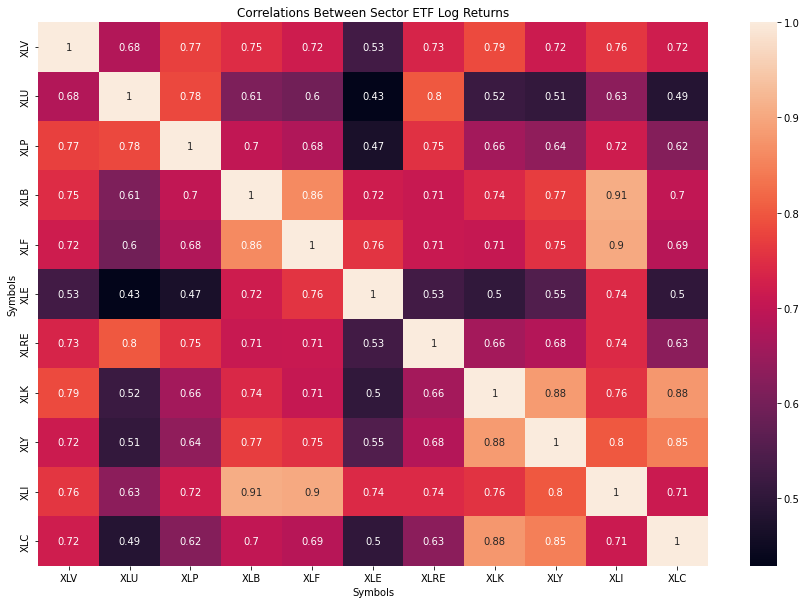

In [35]:
################ EDIT CODE LINES HERE (Optional) #################
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(etfLogRetList.corr(),annot=True)
plt.title("Correlations Between Sector ETF Log Returns")

################################################################

<h2 style="color:Green;">Problem 2: Evaluating Portfolio Risks</h2><br/>

After adding two sector ETFs from part a), the portoflio manager wants to add one more asset into her portfolio, but this time, she wants an asset with daily risks no more than 3% at a 10% significance level. You have become the portoflio manager's favorite quantitative analyst since the previous task, and have been asked to suggest an asset to add to her portfolio with follow-through analysis. Please follow the instructions specified in each part of this problem to deliver your suggestion and analysis.
<br><br>
Notice that any assets can be selected, and not just stocks. For example, cryptocurrency and foreign exchange instruments can be suggested as well. Some relatively new cryptocurrencies (e.g., Solana, USD Coin) only have complete data dating back to three or four years ago, so setting the duration of data further back than these dates may result in inaccurate representation of their relationships.

a) Please specify your asset's ticker and their data duration here. 

In [36]:
################ EDIT CODE LINES HERE #################

ASSET_TICKER = 'VLDR'     # Enter the asset's ticker here
TAU =  5            # duration span (in years) of observed data

###################################################

Run the following code chunk. <br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [37]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
# storing adjusted stock prices into a variable 
assetPx = pdr.get_data_yahoo(ASSET_TICKER, START_DATE, END_DATE)['Adj Close'] 
# converting prices to log returns and removing NaN values
assetLogRet = np.log(assetPx).diff().dropna()

b) Run the following code chunk and observe the histogram for the asset's log returns. Describe its mean, standard deviation, and shape.
<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

-0.0024483876303544707
0.04601455190436305
-0.05320898561488148


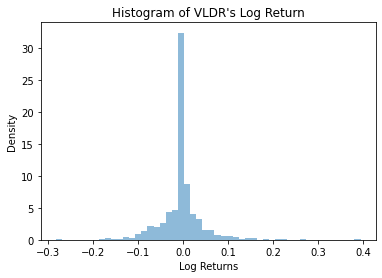

In [38]:
_, bins, _= plt.hist(assetLogRet, bins=50, density=1, alpha=0.5)
plt.title("Histogram of " + ASSET_TICKER + "'s Log Return")
plt.xlabel("Log Returns"); plt.ylabel("Density")
print(assetLogRet.mean())
print(assetLogRet.std())
print(assetLogRet.mean()/assetLogRet.std())

Velodyne Lidar's stock approximately has a mean of somewhere between -0.2% to -0.3%. It's true mean is approximately -0.24%. This is able to show that Velodyne has been performing poorly as it has generally been providing negative log returns. Velodyne is also a very volatile stock as suggested by its standard deviation. It has a standard deviation value of approximately 5%. Its true value is approximately 4.6% which is a quite high value. Velodyne's log return histogram is unimodal and looks approximately normal with a couple of outliers around 38% and  -28% log returns. This histogram suggests that Velodyne would not be a good stock to buy as it is quite volatile and risky, and also because it produces negative mean log returns.  

c) Run the following code chunk and select one of the three probabiltiy distribution curves that you think best fits the histogram. Name the probability distribution and its parameters (e.g., degrees of freedom, location, scale).<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

932


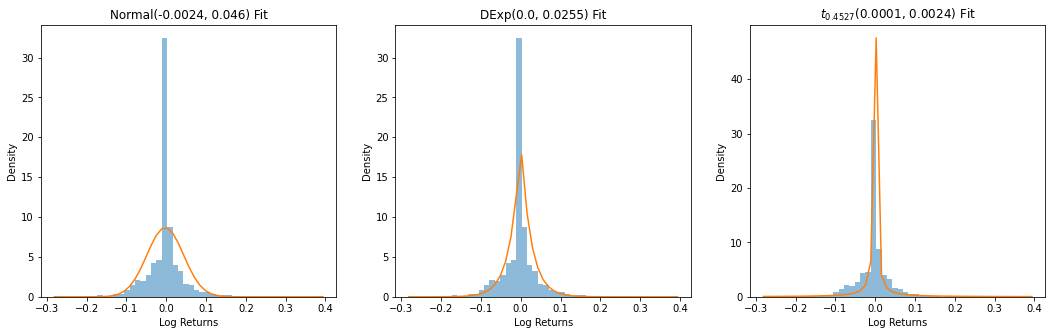

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))
print(len(assetLogRet))
# storing histogram bins and plotting the first histogram
_, bins, _ = axs[0].hist(assetLogRet, bins=50, density=1, alpha=0.5)

#---------------------------w/ Normal PDF-----------------------------
mu, sigma = stats.norm.fit(assetLogRet)
axs[0].plot(bins, stats.norm.pdf(bins, mu, sigma), label='normal pdf')
axs[0].set_title("Normal("+str(np.round(mu, 4))+', '+str(np.round(sigma, 4))+") Fit")

#---------------------------w/ Double Exponential PDF-----------------------------
axs[1].hist(assetLogRet, bins=50, density=1, alpha=0.5)
loc_dexp, scale_dexp = stats.laplace.fit(assetLogRet)
axs[1].plot(bins, laplace.pdf(bins, loc_dexp, scale_dexp), label='double exponential pdf')
axs[1].set_title("DExp("+str(np.round(loc_dexp, 4))+', '+str(np.round(scale_dexp, 4))+") Fit")

#---------------------------w/ Student-t PDF-----------------------------
axs[2].hist(assetLogRet, bins=50, density=1, alpha=0.5)
df_t, loc_t, scale_t = stats.t.fit(assetLogRet)
axs[2].plot(bins, t.pdf(bins, df_t, loc_t, scale_t), label='student-t pdf')
axs[2].set_title("$t_{"+str(np.round(df_t, 4))+"}$"+"("+str(np.round(loc_t, 4))+', '+str(np.round(scale_t, 4))+") Fit")

# labeling x and y axes
for ax in axs.flat:
    ax.set(xlabel='Log Returns', ylabel='Density')


I believe that the Double Exponential (Laplace) Distribution best fits the histogram. Although this graph doesn't fully cover the peak, it does a great job of fitting both tails of the histogram. The degrees of freedom for this distribution is 930 as the length of "assetLogRet" is 931 and we need to subtract 1 from it to get our degrees of freedom value. Its parameters include a value of 0.0 for mu as the location and 0.0255 as the value for the scale. The scale is equal to √2/lambda. 

d)  If you cannot differentiate which distribution is a better fit from part b), run the follow code to fit QQ plots to the asset's log return quantiles. Then select one of the three QQ plots that you think best fits the log return quantiles. What is the theoretical distribution in this QQ plot? Is this distribution same as the one you selected in part b)?<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

Text(0.5, 1.0, "Student-t QQ Plot of VLDR's Log Return")

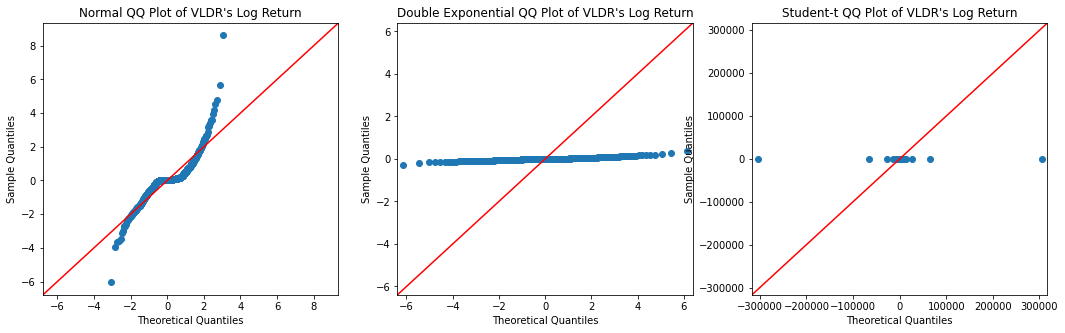

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

#---------------------------w/ Normal QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.norm, fit=True, line='45', ax=axs[0])
axs[0].set_title("Normal QQ Plot of " + ASSET_TICKER + "'s Log Return")

#---------------------------w/ Double Exponential QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.laplace, fit=True, line='45', ax=axs[1])
axs[1].set_title("Double Exponential QQ Plot of " + ASSET_TICKER + "'s Log Return")

#---------------------------w/ Student-t QQ Plot-----------------------------
sm.qqplot(assetLogRet, stats.t, fit=True, line='45', ax=axs[2])
axs[2].set_title("Student-t QQ Plot of " + ASSET_TICKER + "'s Log Return")

The best QQ plot that fits the log return quantiles is the normal Quantile-Quantile Plot of Velodyne Lidar Stock's Log Return. Although the Normal QQ plot doesn't correlate really well with the red line, it is the most appropriate fit out of the three different QQ-plots.The red line represents the quantiles of VLDR's log returns plotted against the theoretical normal data.  The Theoretical distribution does not directly match the sample distribution. For example, at quantile -6 in the sample distribution, theoretically should be -3. Similarly at quantile 9 in the sample distribution, the theoretical quantile should be 3.5. At the left tail, there was an underestimation while at the right tail, there was an overestimation. This distribution is different from the original distribution that I recommended. I initially recommended the Double Exponential QQ Plot, but this plot fails to do as good of a job of fitting the red line. 

e)You are going to make a table summarizing the rVaR and rES at each significant levels with their respective quantiles. Of the code chunks (i), (ii), and (iii), run the appropriate code chunk to get the correct risk information.
<ul>
  <li type = "i">Run if Normal Distribution is selected in part c)</li>
  <li type = "i">Run if Double Exponential Distribution is selected in part c)</li>
  <li type = "i">Run if Student-t Distribution is selected in part c)</li>
</ul>

(i) <p style="color:blue;">IF YOU SELECTED THE NORMAL DISTRIBUTION IN PART c), THEN RUN THIS CHUNK.</p>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

quantile_10 = norm.ppf(0.1, mu, sigma)
quantile_5 = norm.ppf(0.05, mu, sigma)
quantile_1 = norm.ppf(0.01, mu, sigma)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(norm.rvs(loc = mu, scale = sigma, size = 10000000))-1)      # enter code before this comment

(ii) <p style="color:blue;">IF YOU SELECTED THE DOUBLE EXPONENTIAL DISTRIBUTION IN PART c), THEN RUN THIS CHUNK.</p>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [41]:
quantile_10 = laplace.ppf(0.1, loc_dexp, scale_dexp)
quantile_5 = laplace.ppf(0.05, loc_dexp, scale_dexp)
quantile_1 = laplace.ppf(0.01, loc_dexp, scale_dexp)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(laplace.rvs(loc = loc_dexp, scale = scale_dexp, size = 10000000))-1)      # enter code before this comment

(iii) <p style="color:blue;">IF YOU SELECTED THE STUDENT-T DISTRIBUTION IN PART c), THEN RUN THIS CHUNK.</p>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

quantile_10 = t.ppf(0.1, df_t, loc_t, scale_t)
quantile_5 = t.ppf(0.05, df_t, loc_t, scale_t)
quantile_1 = t.ppf(0.01, df_t, loc_t, scale_t)
quantile = [quantile_10, quantile_5, quantile_1] 
random.seed(10) # set a random seed so that anyone who re-runs this will get the same generated outcome
simLoss = -(np.exp(t.rvs(df = df_t, loc = loc_t, scale = scale_t, size = 10000000))-1)      

Run the following code chunk to get the relative Value-at-Risk (rVaR) at each significance level.
<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [42]:
rVaR_10 = -(np.exp(quantile_10)-1)     
rVaR_5 = -(np.exp(quantile_5)-1)     
rVaR_1 = -(np.exp(quantile_1)-1)    
rVaR = [rVaR_10, rVaR_5, rVaR_1] 

Run the following code chunk to get the relative Expected Shortfall (ES) at each significance level.
<br>
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

In [43]:
rES_10 = np.mean(simLoss[simLoss>rVaR_10])   
rES_5 = np.mean(simLoss[simLoss>rVaR_5])      
rES_1 = np.mean(simLoss[simLoss>rVaR_1])      
rES = [rES_10, rES_5, rES_1] 

Run the following code chunk to output the risk summary table.

In [44]:
pd.DataFrame({'Significance Level': ['10%', '5%', '1%'], 'Quantile': [quantile_10, quantile_5, quantile_1], 'rVaR': [rVaR_10, rVaR_5, rVaR_1], 'rES':[rES_10, rES_5, rES_1]})

,Significance Level,Quantile,rVaR,rES
0,10%,-0.041095,0.040262,0.064175
1,5%,-0.058793,0.057098,0.080572
2,1%,-0.099888,0.095061,0.117651


f) The portfolio manager tells you that she is planning to invest $95000 into the stock that you recommended in this problem, and wants to know at least how much (in dollar amount) she has to set aside to sustain the loss that occurrs at a 10% significance level. What would you tell her?

There is a 10% probability that the portfolio manager's portfolio will incur at least a $3828.50 loss if she includes VLDR is in it. To sustain the loss, the portfolio manager has to set aside 4.03% of her money to sustain losses from VLDR's stock in the next trading period. The total amount of money that she should  set aside to cover the losses is $3828.50.

g) She also wants to know on average, how much (in percentage) of her portfolio should she size in to sustain the loss that occurrs at a 5% significance level. What would you tell her?

On average,VLDR's stock will incur at least a $7657 LOSS in the next trading period given a loss of $5424.50 occurs with a 5% probability. The manager needs to set aside 8.06% of her money to sustain her losses from Velodyne Lidar in the next trading period. The total amount of money she should set aside is $7657 to cover the losses. 